In [1]:
from GQLib.Framework import Framework
from GQLib.Optimizers import MPGA, PSO, SA, SGA
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

## DAILY

In [2]:
fw = Framework("daily")
data_wti = fw.select_sample(fw.data, "10/04/2006","14/11/2016")
fw_uso = Framework("daily", True)
data_uso = fw_uso.select_sample(fw_uso.data, "10/04/2006","14/11/2016")
dates_wti = fw.global_dates[data_wti[:,0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:,0].astype(int)]
common_dates = np.intersect1d(dates_wti, dates_uso)

In [3]:
filtered_wti = data_wti[np.isin(dates_wti, common_dates)]
filtered_uso = data_uso[np.isin(dates_uso, common_dates)]
correlation = np.corrcoef(filtered_wti[:, 1], filtered_uso[:, 1])[0, 1]
print(f"La corrélation entre WTI et USO est : {correlation}")
dates_wti_filtered = fw.global_dates[filtered_wti[:,0].astype(int)]
dates_uso_filtered = fw_uso.global_dates[filtered_uso[:,0].astype(int)]

La corrélation entre WTI et USO est : 0.6029338170538019


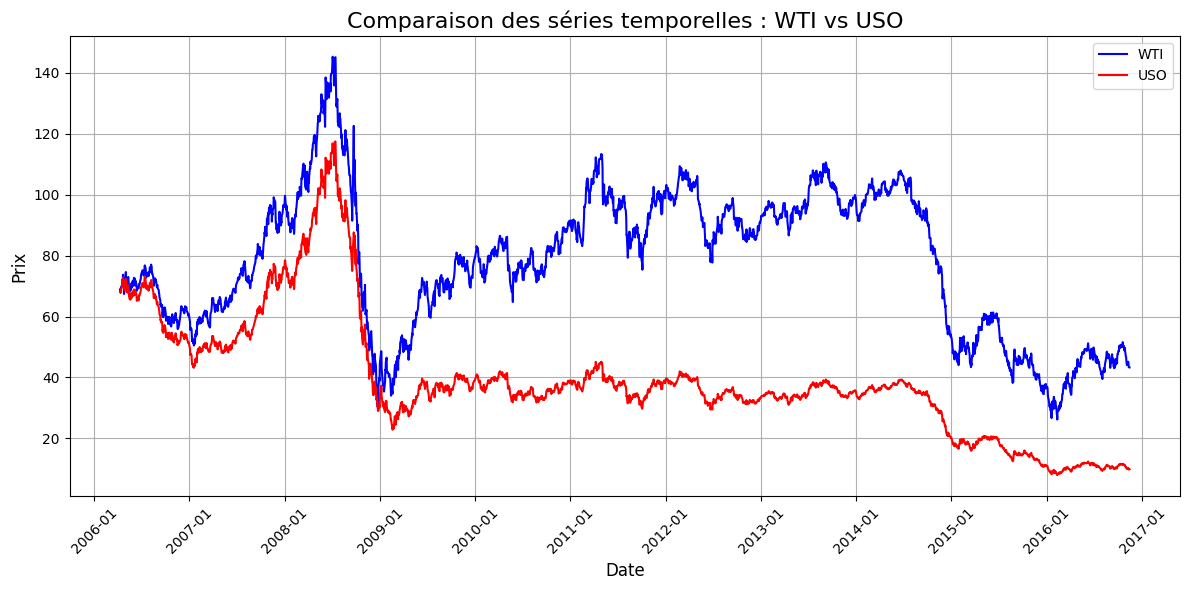

In [4]:
plt.figure(figsize=(12, 6))  # Taille du graphique
# Tracer les prix WTI
plt.plot(dates_wti_filtered, filtered_wti[:, 1], label='WTI', color='blue', linestyle='-')
# Tracer les prix USO
plt.plot(dates_uso_filtered, filtered_uso[:, 1], label='USO', color='red', linestyle='-')
# Ajouter un titre
plt.title('Comparaison des séries temporelles : WTI vs USO', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour éviter le chevauchement
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Marquer les années
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format des dates (Année-Mois)
plt.tight_layout()  # Pour éviter que les éléments du graphique se chevauchent
plt.show()

## WEEKLY

In [5]:
fw = Framework("weekly")
data_wti = fw.select_sample(fw.data, "10/04/2006","14/11/2016")
fw_uso = Framework("weekly", True)
data_uso = fw_uso.select_sample(fw_uso.data, "10/04/2006","14/11/2016")
dates_wti = fw.global_dates[data_wti[:,0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:,0].astype(int)][1:]

In [6]:
correlation = np.corrcoef(data_wti[:, 1], data_uso[1:, 1])[0, 1]
print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.5978794695728392


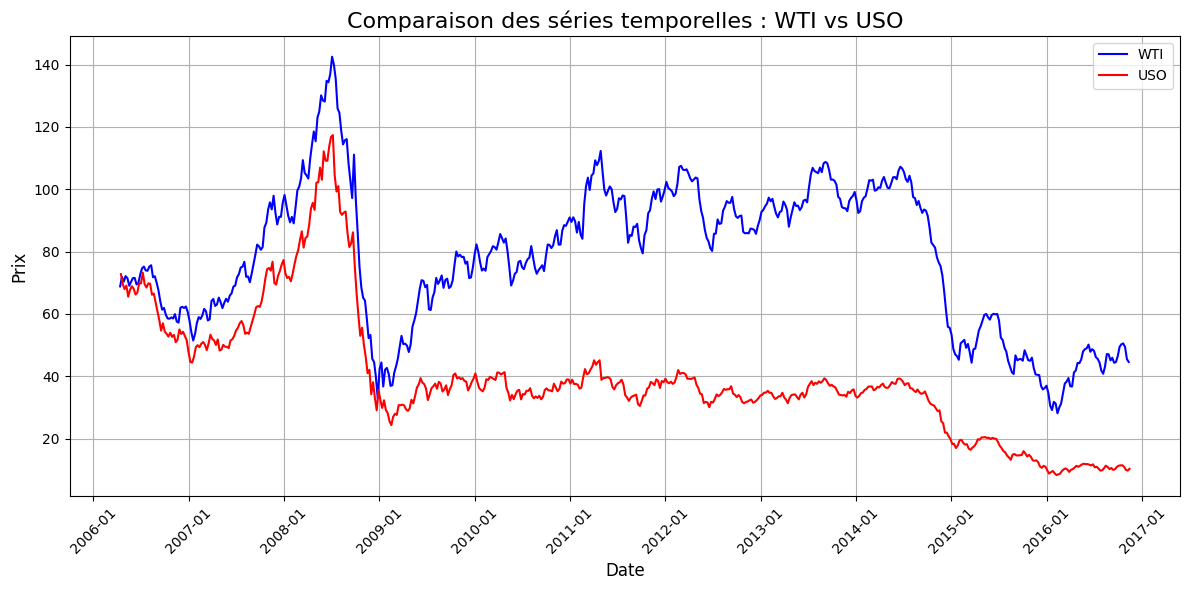

In [7]:
plt.figure(figsize=(12, 6))  # Taille du graphique
# Tracer les prix WTI
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
# Tracer les prix USO
plt.plot(dates_uso, data_uso[1:, 1], label='USO', color='red', linestyle='-')
# Ajouter un titre
plt.title('Comparaison des séries temporelles : WTI vs USO', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour éviter le chevauchement
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Marquer les années
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format des dates (Année-Mois)
plt.tight_layout()  # Pour éviter que les éléments du graphique se chevauchent
plt.show()

## Turning points 

Processing subintervals:   0%|          | 0/90 [00:00<?, ?subinterval/s]

c:\Users\bapdu\COMMUN\Dauphine\Predicting-Oil-Price-Turning-Points\GQLib\njitFunc.py:258: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  fitness[i] = njit_RSS(population[i], data)
Analyzing results: 100%|██████████| 90/90 [00:16<00:00,  5.55result/s]


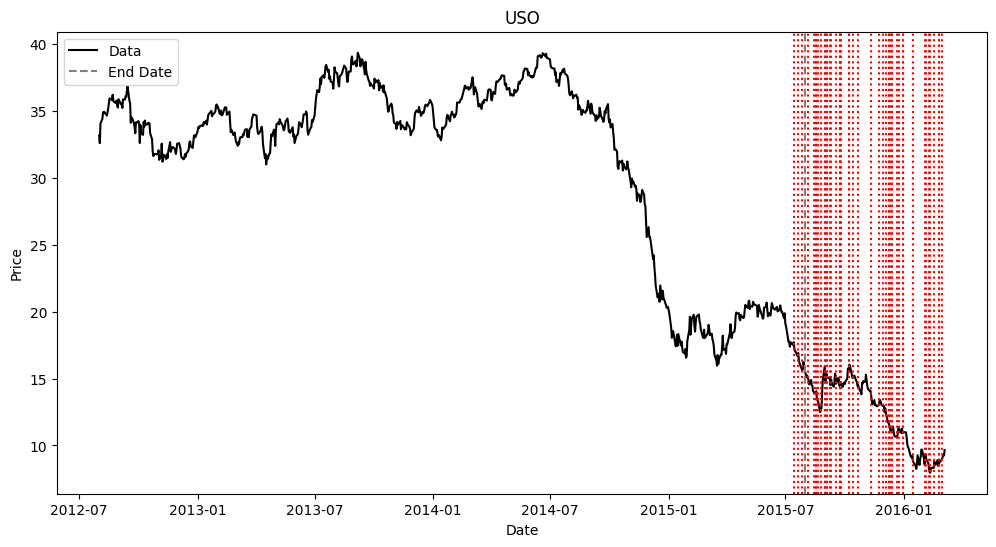

In [8]:
fw_uso = Framework("daily", is_uso = True)
# On renseigne les dates du sample et l'optimiseur à utiliser
optimizer = MPGA()
results = fw_uso.process("29/04/2011", "01/08/2015", optimizer)
# On check la significativité des résultats
best_results = fw_uso.analyze(results)
# On peut visualiser les résultats finaux
fw_uso.visualize(best_results, name = "USO", start_date = "01/08/2012", end_date = "05/03/2016")

In [9]:
len(fw_uso.global_dates)

2670

In [10]:
best_results

[{'sub_start': 1273.0,
  'sub_end': 2343.0,
  'bestObjV': 8940.728362078942,
  'bestParams': [2771.0999727048757,
   5.779982518400422,
   2.614870840611174,
   0.1035510309407778],
  'is_significant': True},
 {'sub_start': 1326.5,
  'sub_end': 2343.0,
  'bestObjV': 6588.388984454304,
  'bestParams': [2353.107933046152,
   2.917333580941266,
   5.490502969286673,
   0.3535179251773217],
  'is_significant': True},
 {'sub_start': 1380.0,
  'sub_end': 2343.0,
  'bestObjV': 6274.603222723,
  'bestParams': [2621.6294525153417,
   5.942926261563102,
   2.8725486579773185,
   0.10407979790869737],
  'is_significant': True},
 {'sub_start': 1433.5,
  'sub_end': 2343.0,
  'bestObjV': 5010.7934325055685,
  'bestParams': [2834.383591593828,
   7.983747452628687,
   6.194634603618062,
   0.1001492133691742],
  'is_significant': True},
 {'sub_start': 1487.0,
  'sub_end': 2343.0,
  'bestObjV': 4882.106710946118,
  'bestParams': [2843.6476906698786,
   7.921092453659537,
   0.2938283440667879,
   0.21